# MovieLens Dataset Exploration

This notebook aims to explore and analyze the MovieLens dataset, specifically the `ml-latest-small` dataset. The goal is to gain a comprehensive understanding of the data before proceeding with building a recommender system.

The dataset contains information about:

- **Movies:** Movie titles, genres, and release years.
- **Ratings:** User ratings for movies on a scale of 1 to 5.
- **Tags:** User-assigned tags to movies.
- **Links:** Links to external movie databases (IMDb and TMDb).

We will use the `utils.py` script provided to load the dataset so we will only be using this function:

- `load_dataset_from_source`: Loads the dataset from the specified directory.

Let's begin by loading the data and examining its structure.

# Loading the Data

In [ ]:
#!pip install -r requirements.txt

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_dataset_from_source
from wordcloud import WordCloud, STOPWORDS


In [5]:
path_to_ml_latest_small = 'datasets/'
dataset = load_dataset_from_source(path_to_ml_latest_small)

movies_df = dataset['movies.csv']
ratings_df = dataset['ratings.csv']
tags_df = dataset['tags.csv']
links_df = dataset['links.csv']

In [15]:
print('Movies dataset:')
print(movies_df.columns)

print('Ratings dataset:')
print(ratings_df.columns)

print('Tags dataset:')
print(tags_df.columns)

print('Links dataset:')
print(links_df.columns)

Ratings dataset:
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Movies dataset:
Index(['movieId', 'title', 'genres', 'year'], dtype='object')
Tags dataset:
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Links dataset:
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


## Exploring the Data

As we have 4 different datasets, we will start by exploring each one of them separately because they have different structures and information.

## Movies Dataset

The movies dataset contains the following columns:
- `movieId`: A unique identifier for each movie.
- `title`: The title of the movie.
- `genres`: A list of genres associated with the movie.
- `year`: The year the movie was released.

We will start be examing genres, to visualize the distribution of genres in the dataset, which are the most common genres, how many genres are there, etc.

### Genres

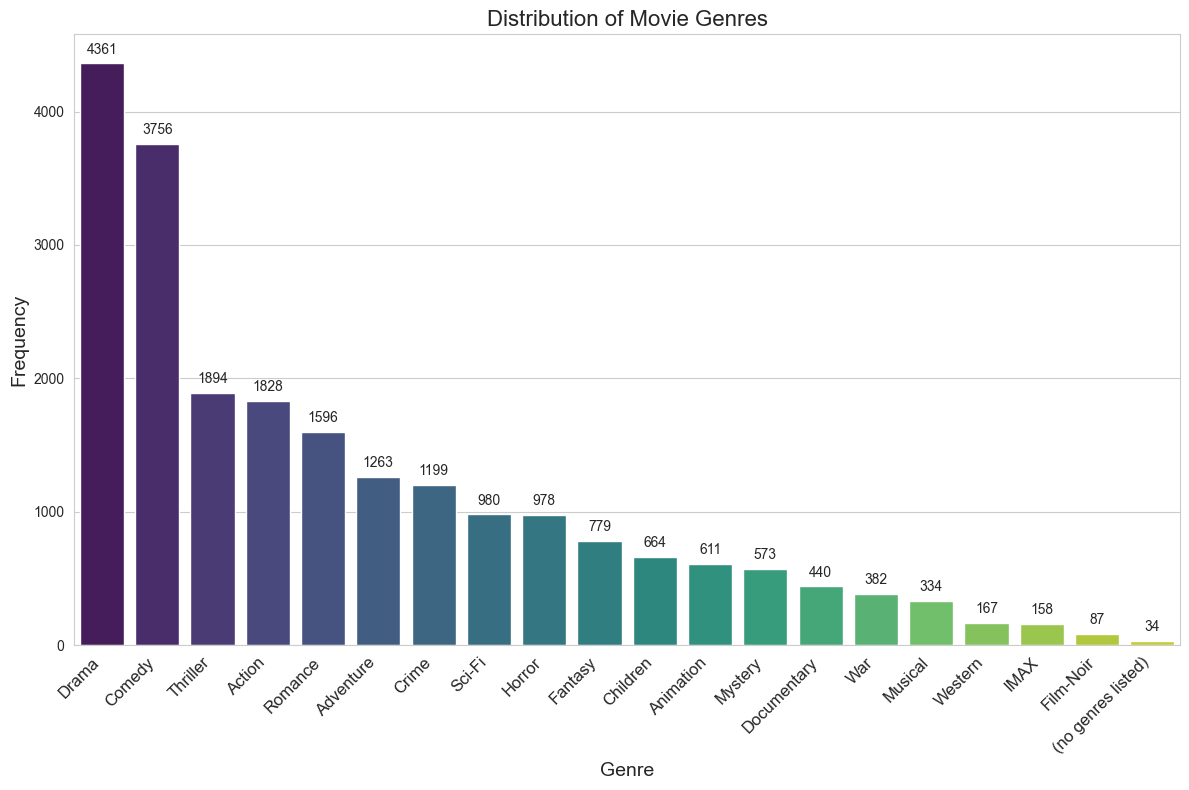

In [18]:
genre_counts = {}
for _, row in movies_df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

# Sort genres by frequency in descending order
sorted_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid") 
ax = sns.barplot(x=list(sorted_genres.keys()), y=list(sorted_genres.values()), hue=list(sorted_genres.keys()), palette="viridis", legend=False)
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

As we can see, Drama and Comedy are the most common genres in the dataset. We also have a total of 20 unique genres. It's also interesting to note that some movies have multiple genres associated with them.

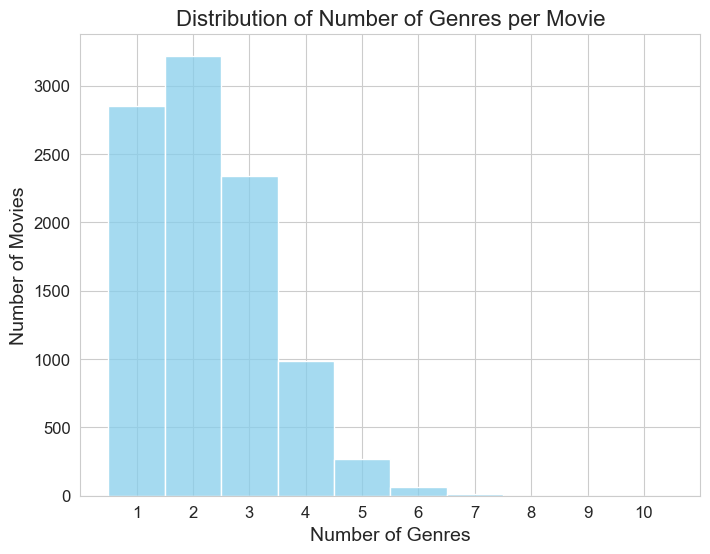

In [19]:
movies_df['num_genres'] = movies_df['genres'].apply(lambda x: len(x.split('|')))

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.histplot(movies_df['num_genres'], bins=10, discrete=True, color='skyblue')
plt.title('Distribution of Number of Genres per Movie', fontsize=16)
plt.xlabel('Number of Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(range(1, movies_df['num_genres'].max() + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Most movies have 1 or 2 genres, but there are some movies with up to 6 genres. The distribution of the number of genres per movie is right-skewed.

### Years
For the next step, we will analyze the distribution of movies over the years.

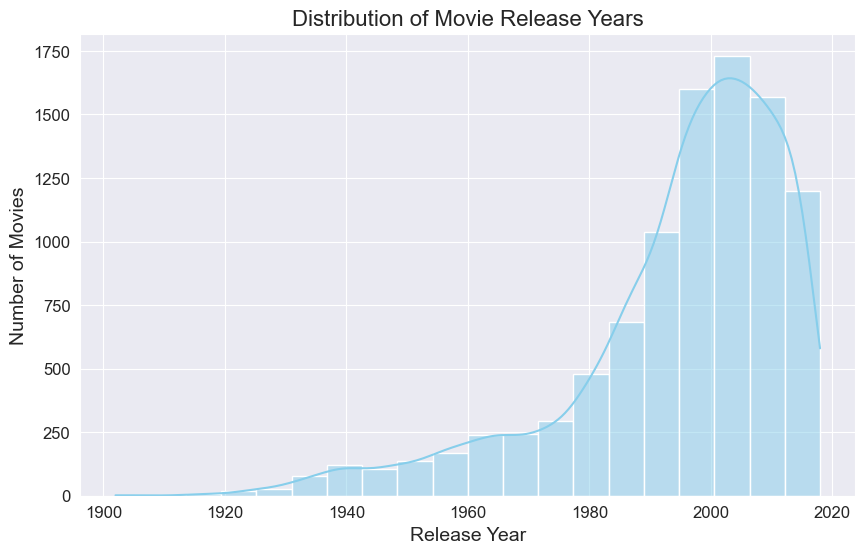

In [17]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(movies_df['year'].dropna().astype(int), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we can see, the number of movies released per year has been increasing over time. The dataset contains movies released from 1902 to 2018, with the majority of movies released after 1990. It's also interesting to note that the number of movies released in 2018 is significantly lower than in previous years.

## Ratings Dataset

The ratings dataset contains the following columns:
- `userId`: A unique identifier for each user.
- `movieId`: A unique identifier for each movie.
- `rating`: The rating given by the user (on a scale of 0.5 to 5).
- `timestamp`: The timestamp when the rating was created.

For this dataset we will be analyzing this three things:

- **Rating Distribution**: Histogram of the ratings to see how users rate movies in general (e.g., are ratings skewed towards higher values?).
- **Number of Unique Users**: Calculate and display the number of unique users in the dataset.
- **User Activity**: Analyze how many ratings each user has given (e.g., histogram, statistics like mean, median, etc.). This could provide an idea of user engagement.

## Ratings Distribution

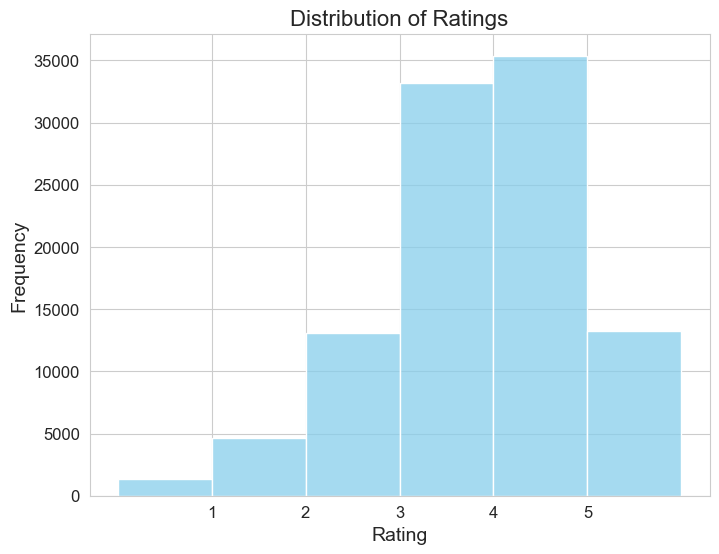

In [20]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.histplot(ratings_df['rating'], bins=5, discrete=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(1, 6), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As we can see, the ratings are skewed towards higher values, with the majority of ratings falling between 3 and 4. The distribution is right-skewed, with a peak around 4.

### Number of Unique Users

In [23]:
num_users = ratings_df['userId'].nunique()
print(f"Number of unique users: {num_users}")

Number of unique users: 610


### User Activity

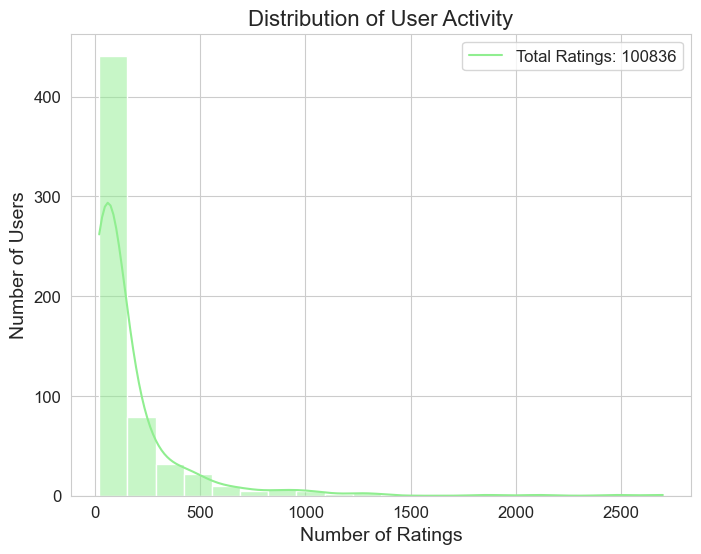

In [26]:
user_activity = ratings_df.groupby('userId')['rating'].count()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.histplot(user_activity, bins=20, color='lightgreen', kde=True)
plt.title('Distribution of User Activity', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend([f'Total Ratings: {user_activity.sum()}'], loc='upper right', fontsize=12)

plt.show()

For better understanding the user activity, we will also need some statistics.

In [25]:
print("User Activity Statistics:")
print(f"  Mean: {user_activity.mean():.2f}")
print(f"  Median: {user_activity.median():.2f}")
print(f"  Min: {user_activity.min()}")
print(f"  Max: {user_activity.max()}")

User Activity Statistics:
  Mean: 165.30
  Median: 70.50
  Min: 20
  Max: 2698


As we can see, users are very active in the dataset, with the majority of users having rated more than 100 movies on average. 

## Tags Dataset

The tags dataset contains the following columns:
- `userId`: A unique identifier for each user.
- `movieId`: A unique identifier for each movie.
- `tag`: The tag assigned by the user.
- `timestamp`: The timestamp when the tag was created.

For this dataset we will be analyzing this two things:
- **Number of Unique Tags**: Calculate and display the number of unique tags in the dataset.
- **Most Common Tags**: Display the most common tags in the dataset.
- **Distribution of Tags per Movie**: Analyze how many tags each movie has on average.

### Number of Unique Tags

In [33]:
print("Number of unique tags:", tags_df['tag'].nunique())

Number of unique tags: 1589


### Most Common Tags

As we have a large amount of total unique tags, we can't display all of them. So we will display the 30 most common tags.

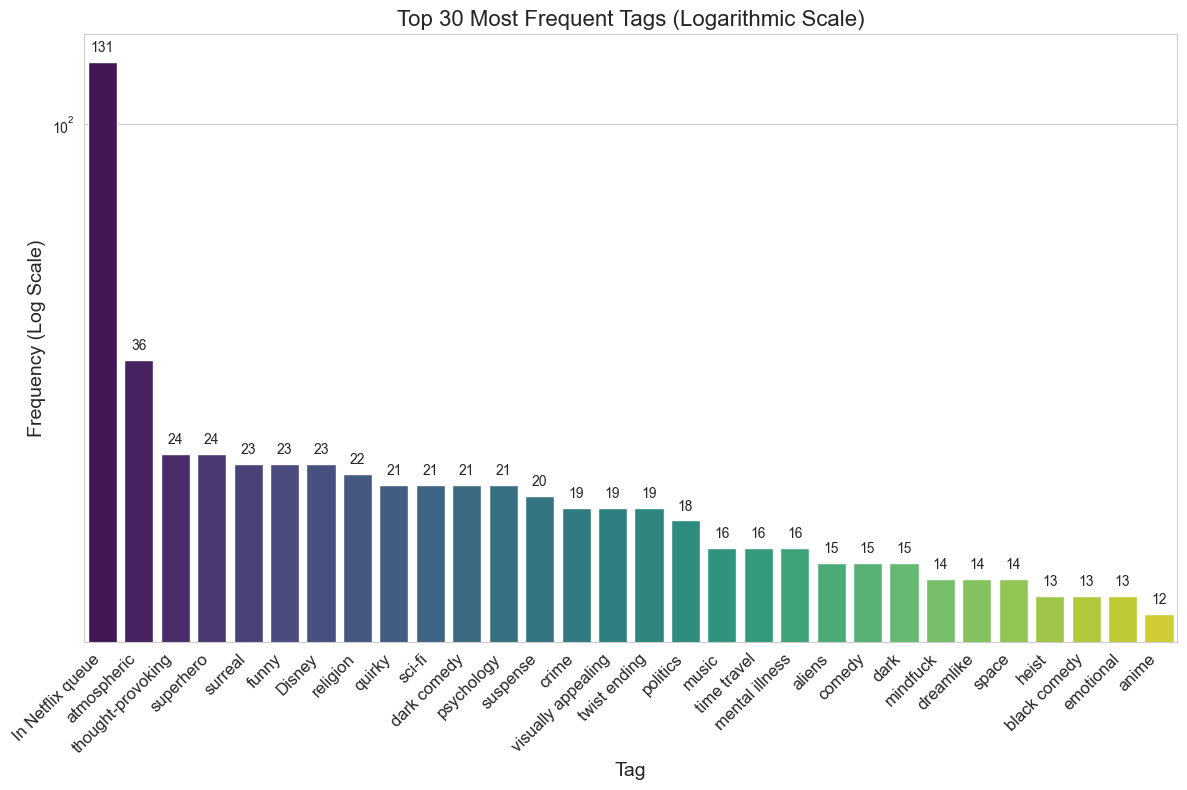

In [ ]:
tag_counts = tags_df['tag'].value_counts()

top_n = 30
top_tags = tag_counts.head(top_n)

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x=top_tags.index, y=top_tags.values, hue=top_tags.index, palette="viridis", legend=False)
plt.title(f'Top {top_n} Most Frequent Tags (Logarithmic Scale)', fontsize=16)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yscale('log') 
plt.tight_layout()

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

As we can see, Tags are in fact different from genres, and they are more specific and subjective. This can be also interesting for the recommendation system, as it can provide more detailed information about the user preferences and make the recommendations more accurate.

### Distribution of Tags per Movie

We want to see how many tags each movie has on average, so we can understand how many tags are usually assigned to a movie and maybe relay on Tags for the recommendation system.

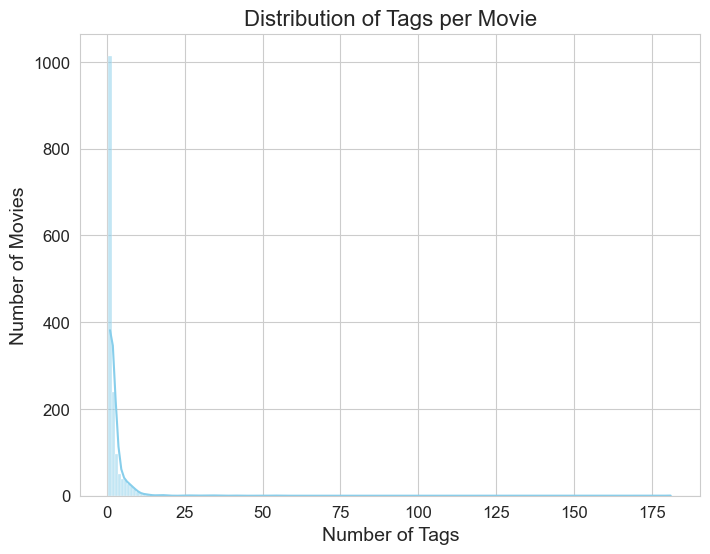

Tags per Movie Statistics:
  Mean: 2.34
  Median: 1.00
  Min: 1
  Max: 181


In [35]:
tags_per_movie = tags_df.groupby('movieId')['tag'].count()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.histplot(tags_per_movie, bins=20, discrete=True, color='skyblue', kde=True)
plt.title('Distribution of Tags per Movie', fontsize=16)
plt.xlabel('Number of Tags', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate and print some statistics
print("Tags per Movie Statistics:")
print(f"  Mean: {tags_per_movie.mean():.2f}")
print(f"  Median: {tags_per_movie.median():.2f}")
print(f"  Min: {tags_per_movie.min()}")
print(f"  Max: {tags_per_movie.max()}")


We can see that most movies have 1 or 2 tags assigned to them. As there are not many tags per movie, we can consider using them as additional features for the recommendation system.

## Links Dataset

The links dataset contains the following columns:
- `movieId`: A unique identifier for each movie.
- `imdbId`: The IMDb identifier for the movie.
- `tmdbId`: The TMDb identifier for the movie.

This datset doesn't have much information, but it can be useful for linking the MovieLens dataset with other external databases.